In [1]:
# Part 1 Problem 1
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "Mean = 3.076"
[1] "Variance = 2.95317717717718"


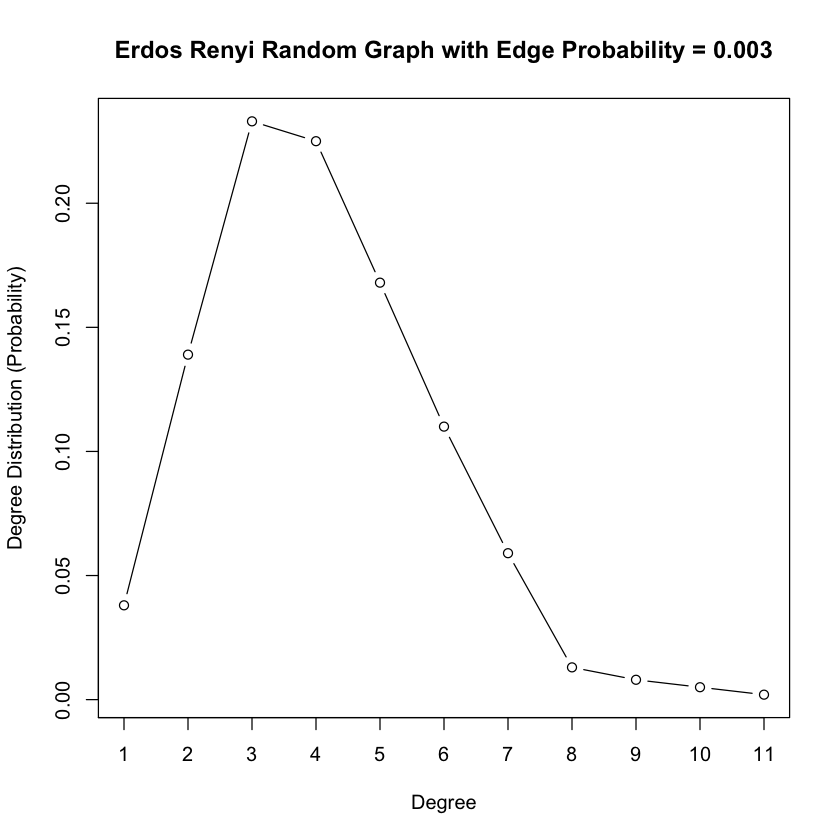

[1] "Mean = 3.896"
[1] "Variance = 3.61079479479479"


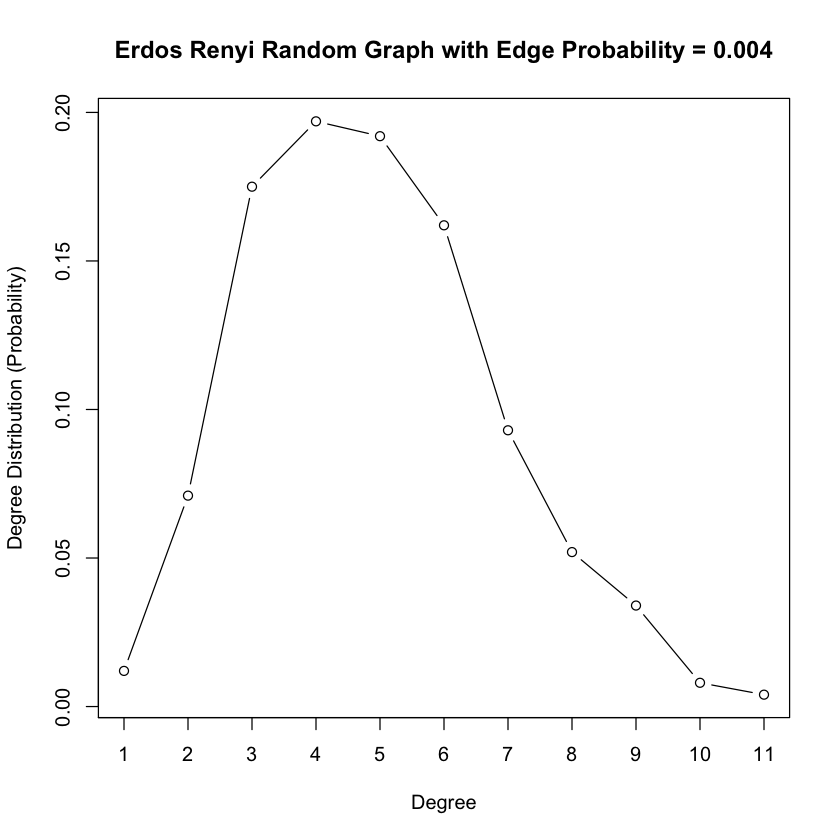

[1] "Mean = 9.976"
[1] "Variance = 9.75317717717718"


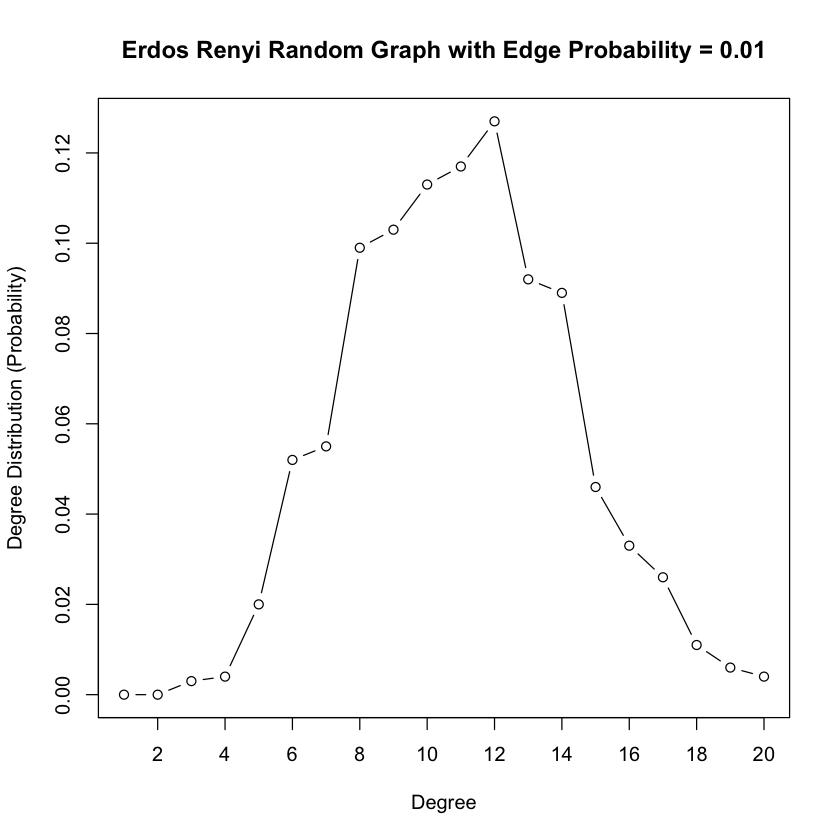

[1] "Mean = 50.204"
[1] "Variance = 46.7591431431431"


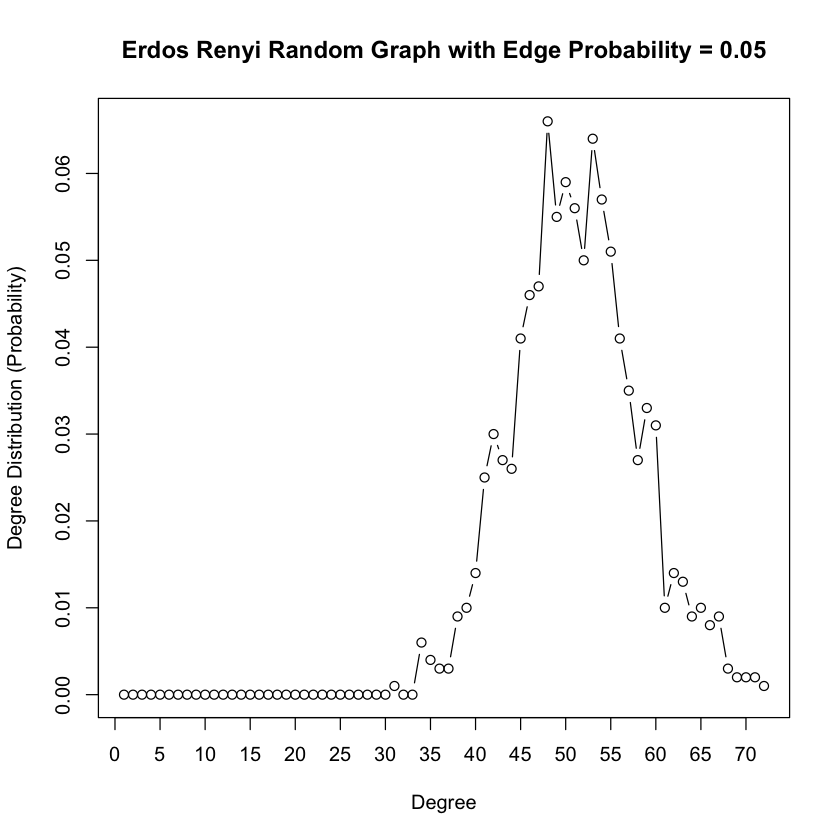

[1] "Mean = 99.89"
[1] "Variance = 90.6345345345345"


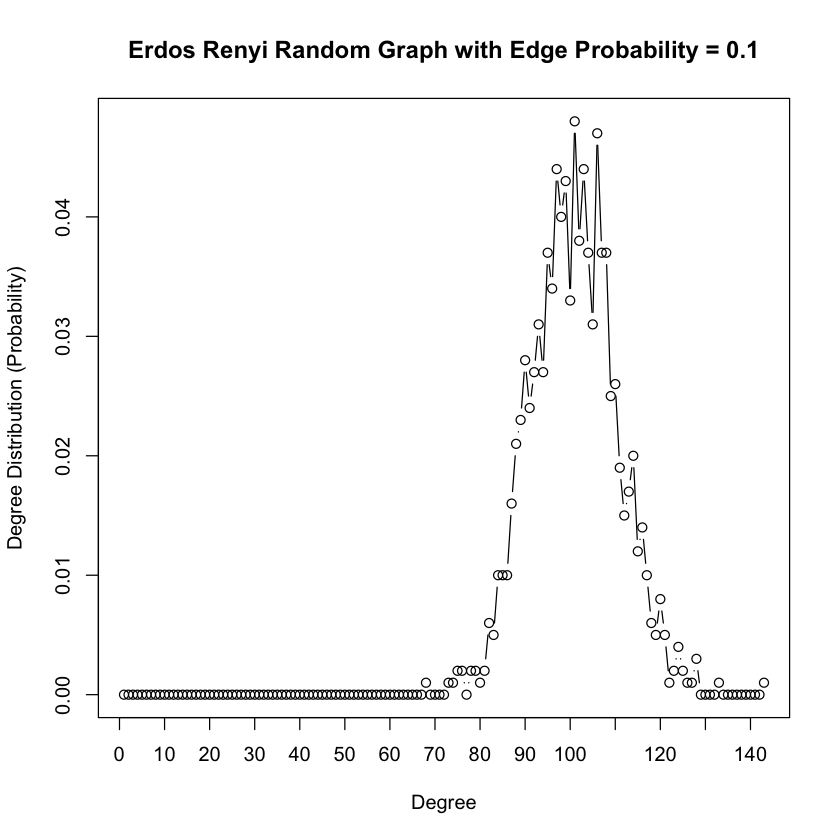

In [2]:
# Problem 1(a)
edge_probs <- c(0.003, 0.004, 0.01, 0.05, 0.1)
graphs <- list()
for (i in 1:length(edge_probs)) {
  g <- erdos.renyi.game(1000, edge_probs[i], directed=F)
  graphs[[i]] <- g
  degree_graph <- degree(g)
  degree_dist <- degree.distribution(g)
  plot(
    degree_dist, type='b', xaxt="n",
    main=paste("Erdos Renyi Random Graph with Edge Probability = ", edge_probs[i], sep=""),
    xlab="Degree", ylab="Degree Distribution (Probability)")
  axis(side=1, at=seq(0, length(degree_dist), by=ceiling(length(degree_dist)/15)))
  print(paste("Mean = ", mean(degree_graph), sep=""))
  print(paste("Variance = ", var(degree_graph), sep=""))
}

In [3]:
# Problem 1(b)
for (i in 1:length(graphs)) {
  if (is.connected(graphs[[i]])) {
    print(sprintf("The generated graph with edge probability %f is connected.", edge_probs[i]))
  } else {
    print(sprintf("The generated graph with edge probability %f is not connected.", edge_probs[i]))
    # Find the giant connected component
    g <- graphs[[i]]
    g.components <- clusters(graphs[[i]])
    # which is the largest component
    ix <- which.max(g.components$csize)
    # get the subgraph correspondent to just the giant component
    gcc <- induced.subgraph(g, which(g.components$membership == ix))
    print(sprintf("Diameter of its Giant Connected Component = %d.", diameter(gcc)))
  }
}

# numerically estimate the probability that a generated network is connected
edge_probs <- c(0.003, 0.004, 0.01, 0.05, 0.1)
for (p in edge_probs) {
  total_times <- 1000;
  connected_times <- 0;
  for (i in 1:total_times) {
    g <- erdos.renyi.game(1000, p, directed=F)
    if (is.connected(g)) {
      connected_times <- connected_times + 1
    }
  }
  print(sprintf("Edge probability = %f: Probability it's connected = %f", p, connected_times / total_times))
}

[1] "The generated graph with edge probability 0.003000 is not connected."
[1] "Diameter of its Giant Connected Component = 15."
[1] "The generated graph with edge probability 0.004000 is not connected."
[1] "Diameter of its Giant Connected Component = 11."
[1] "The generated graph with edge probability 0.010000 is connected."
[1] "The generated graph with edge probability 0.050000 is connected."
[1] "The generated graph with edge probability 0.100000 is connected."
[1] "Edge probability = 0.003000: Probability it's connected = 0.000000"
[1] "Edge probability = 0.004000: Probability it's connected = 0.000000"
[1] "Edge probability = 0.010000: Probability it's connected = 0.956000"
[1] "Edge probability = 0.050000: Probability it's connected = 1.000000"
[1] "Edge probability = 0.100000: Probability it's connected = 1.000000"


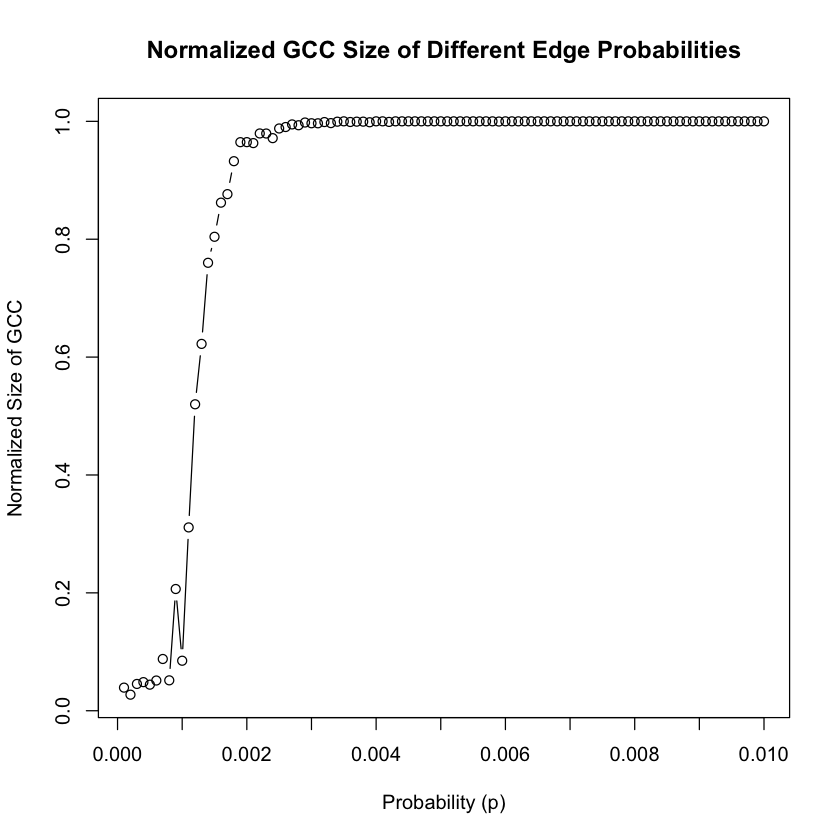

[1] "GCC begins to emerge at edge probabilities: p = "
 [1] 0.0003 0.0018 0.0019 0.0020 0.0022 0.0023 0.0024 0.0025 0.0026 0.0027
[11] 0.0028 0.0029 0.0030 0.0031 0.0032 0.0033 0.0034 0.0035 0.0036 0.0037
[21] 0.0038 0.0039 0.0040 0.0041 0.0042 0.0043 0.0044 0.0045 0.0046 0.0047
[31] 0.0048 0.0049 0.0050 0.0051 0.0052 0.0053 0.0054 0.0055 0.0056 0.0057
[41] 0.0058 0.0059 0.0060 0.0061 0.0062 0.0063 0.0064 0.0065 0.0066 0.0067
[51] 0.0068 0.0069 0.0070 0.0071 0.0072 0.0073 0.0074 0.0075 0.0076 0.0077
[61] 0.0078 0.0079 0.0080 0.0081 0.0082 0.0083 0.0084 0.0085 0.0086 0.0087
[71] 0.0088 0.0089 0.0090 0.0091 0.0092 0.0093 0.0094 0.0095 0.0096 0.0097
[81] 0.0098 0.0099 0.0100
[1] "Edge probability when GCC takes up over 99% of nodes: 0.0052"


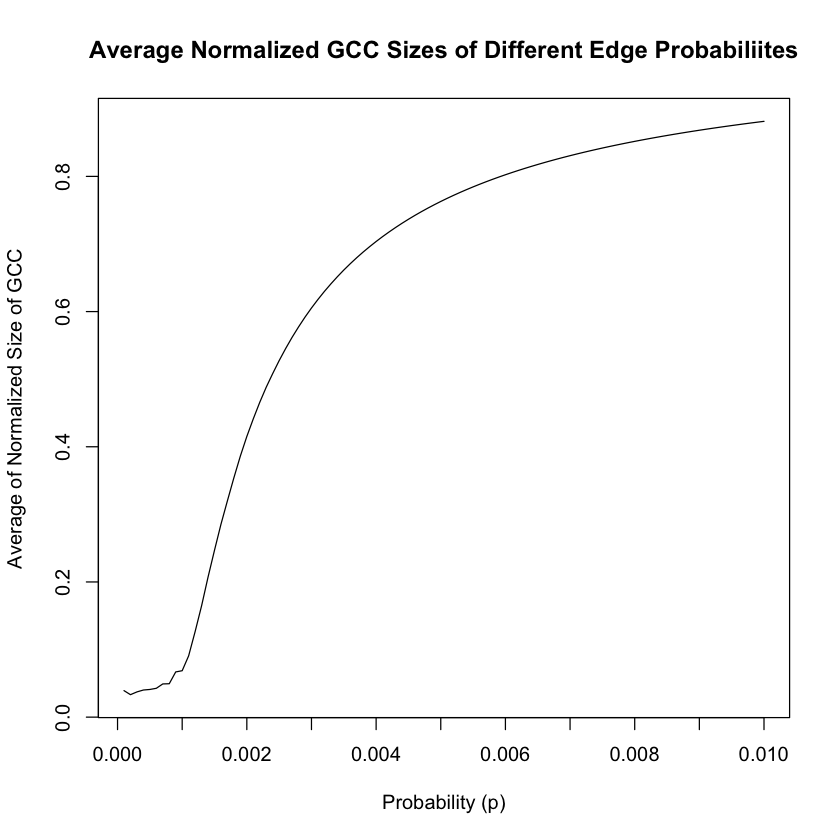

In [4]:
# Problem 1(c)
EDGE_PROB_UPPER_BOUND = 0.01  # P-max where the graph is almost surely connected
probs <- seq(EDGE_PROB_UPPER_BOUND / 100, EDGE_PROB_UPPER_BOUND, by=(EDGE_PROB_UPPER_BOUND/100))
normalized_gcc_size <- c()
avg_gcc_size <- c()
probs_with_gcc <- c()

for (i in 1:length(probs)) {
  g <- erdos.renyi.game(1000, probs[i], directed=F)
  g.components <- clusters(g)
  ix <- which.max(g.components$csize)
  gcc <- induced.subgraph(g, which(g.components$membership == ix))
  normalized_gcc_size[i] <- gsize(gcc) / gsize(g)
  avg_gcc_size[i] <- mean(normalized_gcc_size)
  
  # Track all edge probabilities when a giant connected component exists in that graph
  # A GCC exists if only one cluster has size >= log(N) where N = number of nodes
  is_component_giant <- function(x) { return (x > log(1000, base=exp(1))) }
  g_components_size_filtered <- Filter(is_component_giant, clusters(g)$csize)
  if (length(g_components_size_filtered) == 1) {
    probs_with_gcc <- append(probs_with_gcc, probs[i])
  }
}
plot(probs, normalized_gcc_size, type='b', xaxt='n',
     main="Normalized GCC Size of Different Edge Probabilities", 
     xlab="Probability (p)", ylab="Normalized Size of GCC")
axis(side=1, at=seq(0, 0.01, by=0.001))
plot(probs, avg_gcc_size, type='l', xaxt='n',
     main="Average Normalized GCC Sizes of Different Edge Probabiliites",
     xlab="Probability (p)", ylab="Average of Normalized Size of GCC")
axis(side=1, at=seq(0, 0.01, by=0.001))
print("GCC begins to emerge at edge probabilities: p = ")
print(probs_with_gcc)

# Empirically estimate the value of p where the giant connected component takes up over 99% of the nodes in almost every experiment
for (i in 1:length(probs)) {
  NUM_ITER <- 50
  valid_count <- 0;
  for (iter in 1:NUM_ITER) {
    g <- erdos.renyi.game(1000, probs[i], directed=F)
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    gcc <- induced.subgraph(g, which(g.components$membership == ix))
    if (vcount(gcc) >= 0.99 * 1000) {
      valid_count = valid_count + 1
    }
  }
  if (valid_count >= NUM_ITER * 1) {
    print(paste("Edge probability when GCC takes up over 99% of nodes: ", probs[i], sep=""))
    break
  }
}

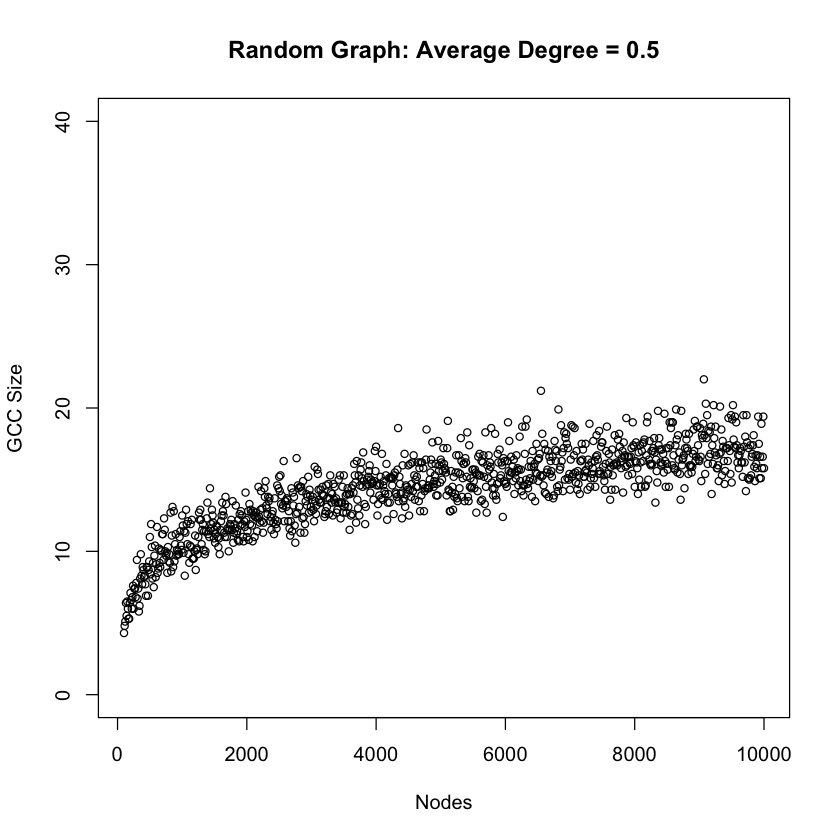

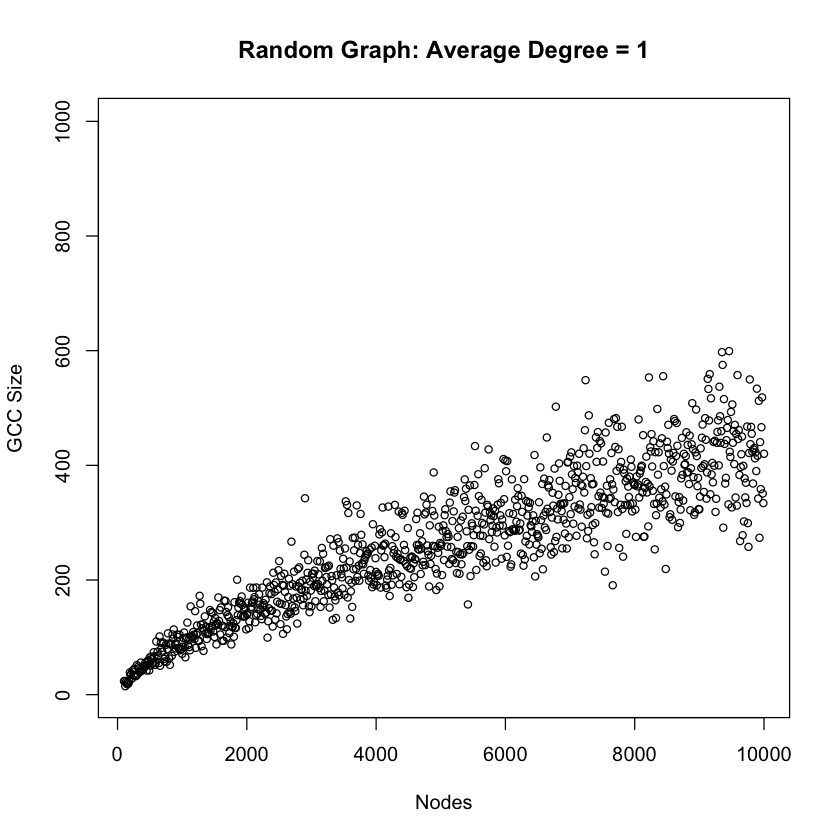

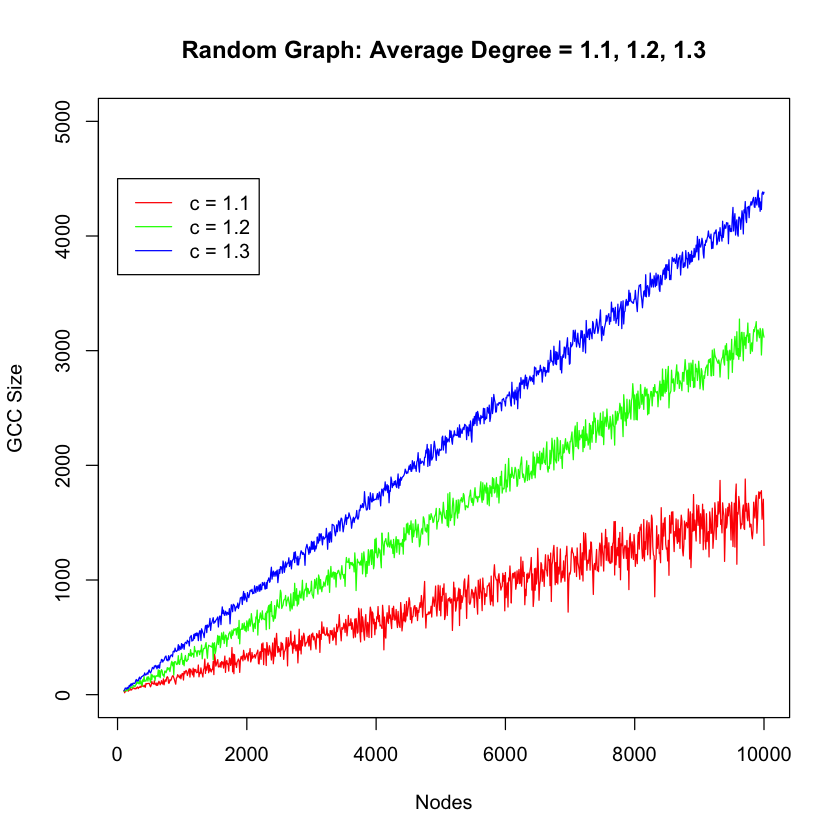

In [5]:
# Problem 1(d)
get_expected_gcc_size = function(n, p) {
  gcc_sizes = c()
  for (i in 1:10) {
    g <- erdos.renyi.game(n, p, directed=F)
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    gcc <- induced.subgraph(g, which(g.components$membership == ix))
    gcc_sizes[i] <- gsize(gcc)
  }
  return(mean(gcc_sizes))
}

generate_plot_at_avg_deg = function(c) {
  nodes_num = seq(100, 10000, by=10)
  gcc_sizes = c()
  for (i_nodes in 1:length(nodes_num)) {
    p <- c / nodes_num[[i_nodes]]
    gcc_sizes[i_nodes] <- get_expected_gcc_size(nodes_num[[i_nodes]], p)
  }
  return(list(nodes_num, gcc_sizes))
}

plot_1 <- generate_plot_at_avg_deg(0.5)
plot(plot_1[[1]], plot_1[[2]], type='p', cex=0.8, ylim=c(0, 40),
     main="Random Graph: Average Degree = 0.5", xlab="Nodes", ylab="GCC Size")

plot_2 <- generate_plot_at_avg_deg(1)
plot(plot_2[[1]], plot_2[[2]], type='p', cex=0.8, ylim=c(0, 1000),
     main="Random Graph: Average Degree = 1", xlab="Nodes", ylab="GCC Size")

plot_3 <- generate_plot_at_avg_deg(1.1)
plot_4 <- generate_plot_at_avg_deg(1.2)
plot_5 <- generate_plot_at_avg_deg(1.3)
plot(plot_3[[1]], plot_3[[2]], type='l', col=rainbow(3)[1], 
     main="Random Graph: Average Degree = 1.1, 1.2, 1.3", xlab="Nodes", ylab="GCC Size", ylim=c(0, 5000))
lines(plot_4[[1]], plot_4[[2]], col=rainbow(3)[2])
lines(plot_5[[1]], plot_5[[2]], col=rainbow(3)[3])
legend(1, 4500, legend=c("c = 1.1", "c = 1.2", "c = 1.3"), lty=1, col=c(rainbow(3)[1], rainbow(3)[2], rainbow(3)[3]))
